In [ ]:
# Colab: install scikit-fuzzy (run once per session)
!pip install -q scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Universes (0..100 with step 1)
x = np.arange(0, 101, 1)

# Inputs (Antecedents)
temperature = ctrl.Antecedent(x, 'temperature')
humidity    = ctrl.Antecedent(x, 'humidity')

# Output (Consequent)
fan_speed   = ctrl.Consequent(x, 'fan_speed')


In [ ]:
# Temperature MFs
temperature['cold']  = fuzz.trimf(temperature.universe, [ 0,  0, 40])
temperature['warm']  = fuzz.trimf(temperature.universe, [20, 50, 80])
temperature['hot']   = fuzz.trimf(temperature.universe, [60,100,100])

# Humidity MFs
humidity['dry']      = fuzz.trimf(humidity.universe,    [ 0,  0, 40])
humidity['normal']   = fuzz.trimf(humidity.universe,    [30, 50, 70])
humidity['humid']    = fuzz.trimf(humidity.universe,    [60,100,100])

# Fan speed MFs
fan_speed['low']     = fuzz.trapmf(fan_speed.universe,  [ 0,  0, 25, 45])
fan_speed['medium']  = fuzz.trimf(fan_speed.universe,   [30, 50, 70])
fan_speed['high']    = fuzz.trapmf(fan_speed.universe,  [60, 80,100,100])


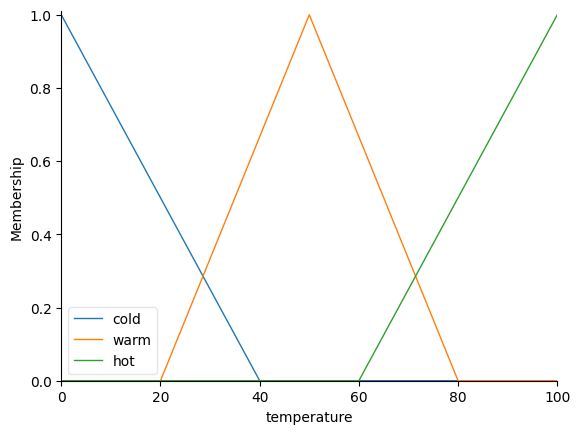

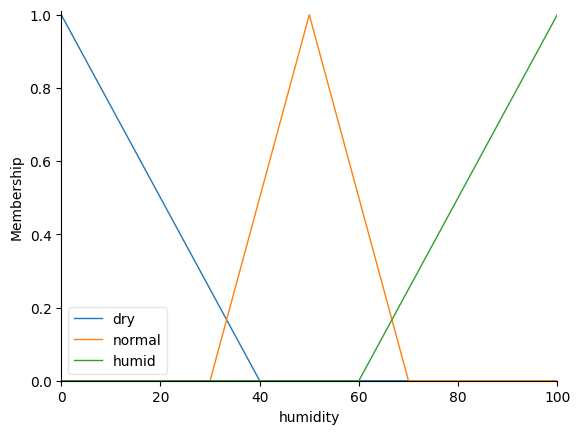

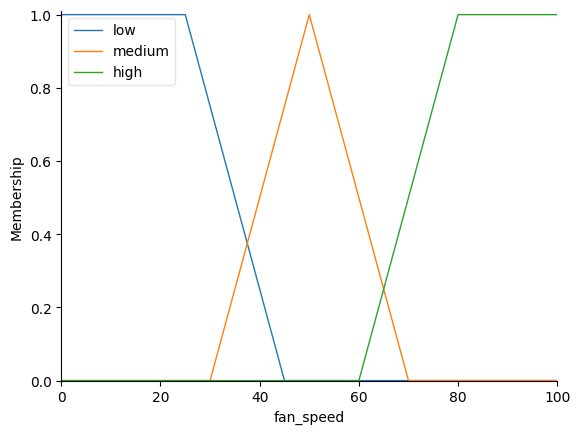

In [ ]:
temperature.view(); humidity.view(); fan_speed.view();
plt.show()


In [ ]:
rule1 = ctrl.Rule(temperature['cold'] & humidity['dry'],    fan_speed['low'])
rule2 = ctrl.Rule(temperature['cold'] & humidity['normal'], fan_speed['low'])
rule3 = ctrl.Rule(temperature['cold'] & humidity['humid'],  fan_speed['medium'])

rule4 = ctrl.Rule(temperature['warm'] & humidity['dry'],    fan_speed['medium'])
rule5 = ctrl.Rule(temperature['warm'] & humidity['normal'], fan_speed['medium'])
rule6 = ctrl.Rule(temperature['warm'] & humidity['humid'],  fan_speed['high'])

rule7 = ctrl.Rule(temperature['hot']  & humidity['dry'],    fan_speed['medium'])
rule8 = ctrl.Rule(temperature['hot']  & humidity['normal'], fan_speed['high'])
rule9 = ctrl.Rule(temperature['hot']  & humidity['humid'],  fan_speed['high'])


Defuzzified fan speed: 66.23


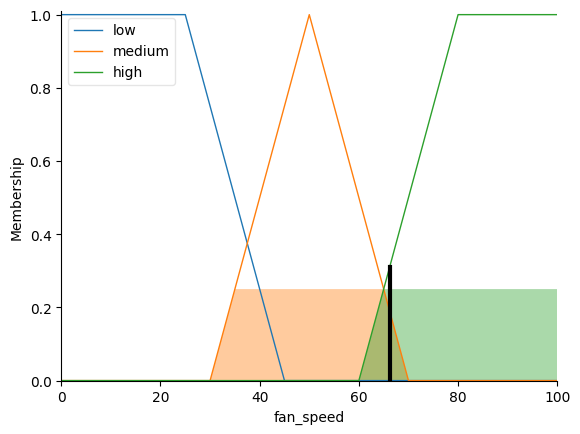

In [ ]:
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
fan_sim  = ctrl.ControlSystemSimulation(fan_ctrl)

# Try an example input
fan_sim.input['temperature'] = 72
fan_sim.input['humidity']    = 65
fan_sim.compute()

print(f"Defuzzified fan speed: {fan_sim.output['fan_speed']:.2f}")
fan_speed.view(sim=fan_sim); plt.show()


[Bisector] fan speed: 66.25


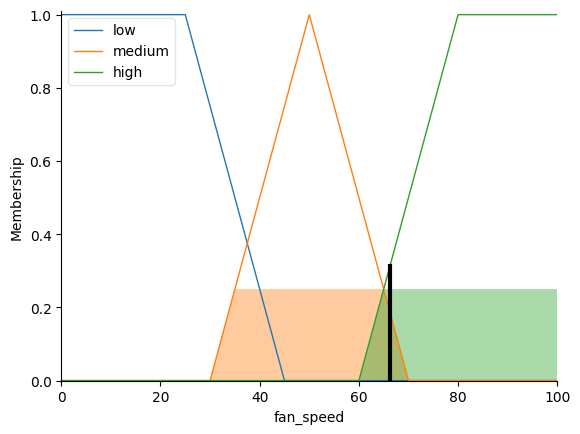

In [ ]:
# Options: 'centroid' (default), 'bisector', 'mom', 'som', 'lom'
fan_speed.defuzzify_method = 'bisector'

fan_sim = ctrl.ControlSystemSimulation(fan_ctrl)
fan_sim.input['temperature'] = 72
fan_sim.input['humidity']    = 65
fan_sim.compute()

print(f"[Bisector] fan speed: {fan_sim.output['fan_speed']:.2f}")
fan_speed.view(sim=fan_sim); plt.show()

# Reset to centroid if you wish:
# fan_speed.defuzzify_method = 'centroid'


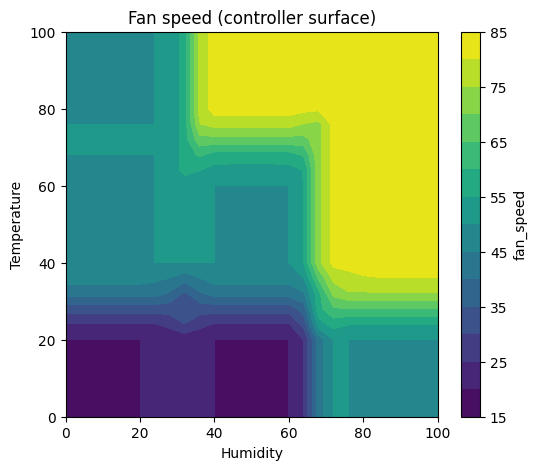

In [ ]:
T = np.linspace(0, 100, 26)   # 26 x 26 grid
H = np.linspace(0, 100, 26)
Z = np.zeros((len(T), len(H)))

sim = ctrl.ControlSystemSimulation(fan_ctrl)

for i, t in enumerate(T):
    for j, h in enumerate(H):
        sim.input['temperature'] = float(t)
        sim.input['humidity']    = float(h)
        sim.compute()
        Z[i, j] = sim.output['fan_speed']

# Simple contour plot
plt.figure(figsize=(6,5))
CS = plt.contourf(H, T, Z, levels=15)
plt.xlabel('Humidity'); plt.ylabel('Temperature'); plt.title('Fan speed (controller surface)')
plt.colorbar(CS, label='fan_speed')
plt.show()
